## 決策樹
Decision trees（決策樹）是一種過程直覺單純、執行效率也相當高的監督式機器學習模型，適用於classification及regression資料類型的預測，與其它的ML模型比較起來，執行速度是它的一大優勢。此外，Decision trees的特點是每個決策階段都相當的明確清楚（不是YES就是NO），相較之下，Logistic Regression與Support Vector Machines就好像黑箱一樣，我們很難去預測或理解它們內部複雜的運作細節。而且Decision trees有提供指令讓我們實際的模擬並繪出從根部、各枝葉到最終節點的決策過程。

剛剛學過決策邊界，你找到有三個特徵

A：是否戴口罩

B：是否打疫

C：是否14天有出國

假設是你發現找到確診案例的公式是 sigmoid(-50 + 300 * A ＋ 240 * B + 163 * C) > 0.5 則代表是確診

你很開心地跑去跟衛生署的人說明，但是卻很少人可以懂你的模型在幹麼

這時候你用了決策樹，你改變你的說法，只要沒有打口罩，有70%會確診；若帶口罩的前提之下但是沒有打疫苗，還是有70%會確診...

讓非專業資料分析人員也可以清楚在幹麼，解釋力也很強

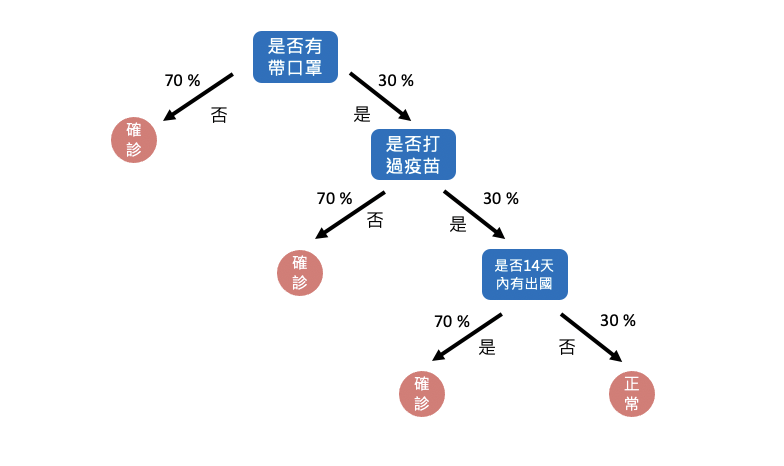

### 什麼是決策樹？
- 用來處理問題的樹狀結構
- 每個內部節點表示一個評估欄位
- 模仿人類決策的過程 

### 優缺點
- 優點
  - 簡單且具有高度解釋力
  - 執行速度快
- 缺點
  - 模型容易過度擬合
  - 特徵過多的時候，樹會非常多分支


### 決策樹的評估指標
- 以吉尼係數(Gini)作為選擇依據（不純度計算）
- 亦可用資訊增益(Information Gain)（用熵計算）


### 吉尼不純度（Gini Impurity）

- 假設資料集合 S 包含 n 個類別，吉尼係數 Gini(S) 定義為，pj為在S中的值組屬於類別j的機率

$$ Gini(S) =  1 - \sum_\limits{j=1}^{n} p_j^2$$

- 利用屬性A分割資料集合 S 為 S1 與 S2 (二元分割)。則根據此一分割要件的吉尼係數GiniA(S)為

$$ Gini_A(S)= \frac{|S_1|}{S}Gini(S_1) + \frac{|S_2|}{S}Gini(S_2) $$

- Gini impurity (吉尼不純度)降低值:

$$ \Delta Gini(A) = Gini(S) - Gini_A(S)$$

挑選擁有最大不純度的降低值、或吉尼不純度GiniA(S)最小 的屬性作為分割屬性。

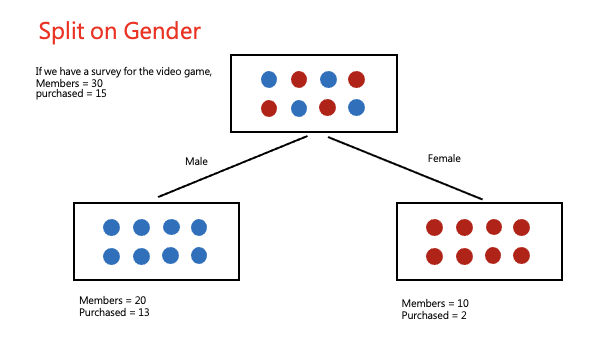

| 說明      |  計算     |
| -------- | -------- | 
| female的 Gini index   |  $$ 1 - (2/10)^2 - (8/10)^2 = 0.32$$ | 
| male的 Gini index   |  $$ 1 - (13/20)^2 - (7/20)^2 = 0.455$$ | 
| 加權計算後  Gini index  |  $$ (10/30)*0.32 + (20/30)*0.455 = 0.41$$ | 

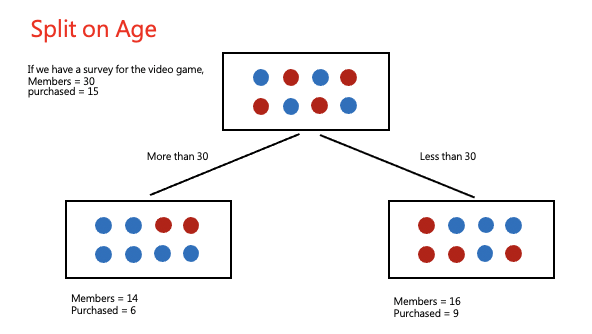

| 說明      |  計算     |
| -------- | -------- | 
| more than 30 的 Gini index  |  $$ 1 - (6/14)^2 - (8/14)^2 = 0.489 $$ | 
| less than 30 的 Gini index   |  $$ 1 - (9/16)^2 - (7/16)^2 = 0.492$$ | 
| 加權計算後  Gini index   |  $$ (16/30)*0.489 + (14/30)*0.492 = 0.49$$ | 

性別的分類有比較小的Gini不純度，代表用該特徵分類後資料比較不混亂

### 資訊獲利（Information Gain, IG）
以熵 (Entropy) 為基礎 
熵 (亂度)，可當作資訊量的凌亂程度 (不確定性) 指標，當熵值愈大，則代表資訊的凌亂程度愈高。 

$$ Entropy = -\sum p_j log_2 p_j$$
$$ IG = -p * log_2 p - q * log_2 q$$

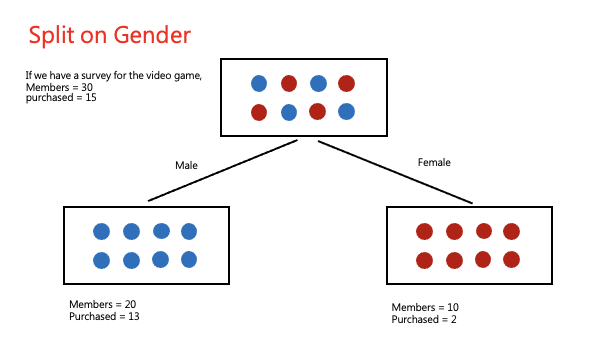

| 說明      |  計算     |
| -------- | -------- | 
| female的 Entropy   |  $$ - (2/10)log_2(2/10) - (8/10)log_2(8/10) = 0.72 $$ | 
| male的 Entropy   |  $$  - (13/20)log_2(13/10) - (7/20)log_2(7/20) = 0.93$$ | 
| 加權計算後 Entropy |  $$ (10/30)*0.72 + (20/30)*0.93 = 0.86$$ | 

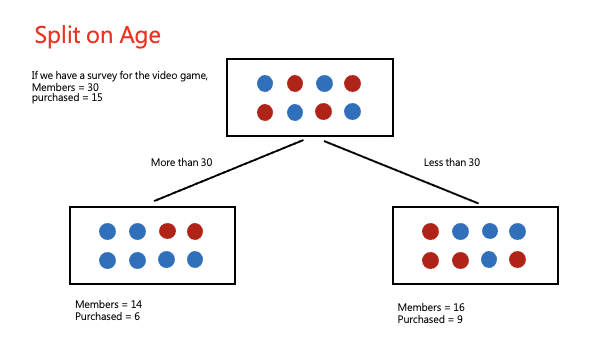

| 說明      |  計算     |
| -------- | -------- | 
| more than 30 的 Entropy  |  $$  - (6/14)log_2(6/14) - (8/14)log_2(8/14) = 0.99 $$ | 
| less than 30 的 Entropy   |  $$ - (9/16)log_2(9/16) - (7/16)log_2(7/16) = 0.99 $$ | 
| 加權計算後 Entropy  |  $$ (14/30)*0.99 + (16/30)*0.99 = 0.99$$ | 

性別的分類有比較小熵，代表用該特徵分類後資料比較不混亂

### 實作決策樹

In [73]:
# Decision Tree Classification
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Book_Purchased.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 5].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [74]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [75]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57 10]
 [ 6 27]]


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        67
           1       0.73      0.82      0.77        33

    accuracy                           0.84       100
   macro avg       0.82      0.83      0.82       100
weighted avg       0.85      0.84      0.84       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


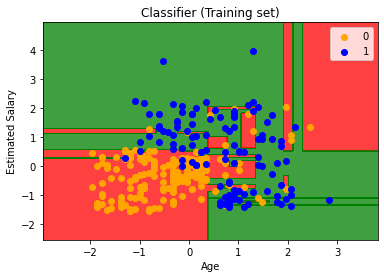

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


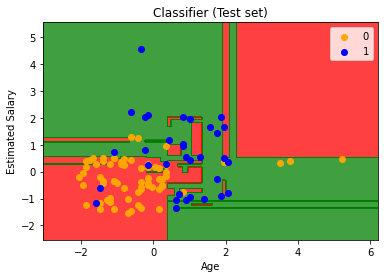

CPU times: user 703 ms, sys: 79.1 ms, total: 782 ms
Wall time: 444 ms


In [76]:
%%time
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



### 決策樹的樹壯圖

Accuracy: 90.0%
|--- VIP <= 0.50
|   |--- Age <= 47.50
|   |   |--- Salary <= 100650.00
|   |   |   |--- class: 0
|   |   |--- Salary >  100650.00
|   |   |   |--- class: 1
|   |--- Age >  47.50
|   |   |--- Age <= 61.50
|   |   |   |--- class: 1
|   |   |--- Age >  61.50
|   |   |   |--- class: 0
|--- VIP >  0.50
|   |--- Age <= 44.50
|   |   |--- Salary <= 99550.00
|   |   |   |--- class: 0
|   |   |--- Salary >  99550.00
|   |   |   |--- class: 1
|   |--- Age >  44.50
|   |   |--- Age <= 65.00
|   |   |   |--- class: 1
|   |   |--- Age >  65.00
|   |   |   |--- class: 0



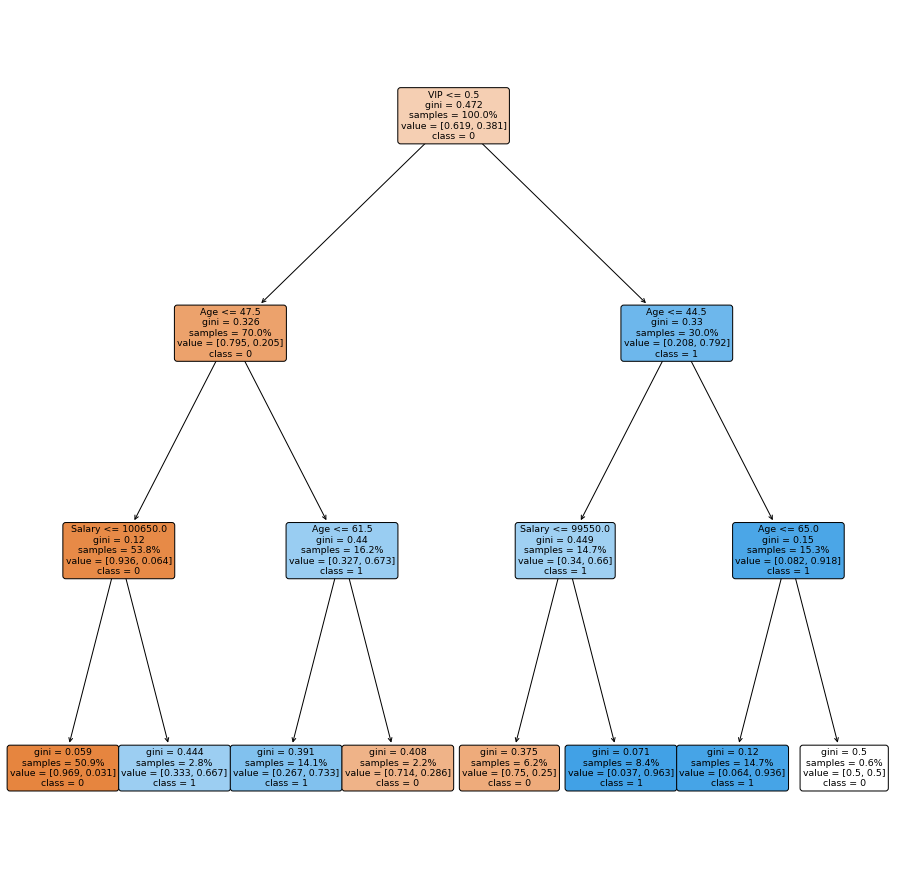

In [68]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Book_Purchased.csv')
dataset['Purchased'] = dataset['Purchased'].astype('str')
X = dataset.iloc[:, [2, 3, 4]].values
y = dataset.iloc[:, 5].values
feature_names = np.array(dataset.columns.tolist()[2:5])  # 取出特徵名稱
class_names = dataset.Purchased.unique() # 取出標籤/分類名稱
dx_train, dx_test, dy_train, dy_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 建立決策樹 (3 層) 並預測結果
model = DecisionTreeClassifier(max_depth=3)
model.fit(dx_train, dy_train)
predict = model.predict(dx_test)
test_score = model.score(dx_test, dy_test) * 100
# 印出預測精確率
print(f'Accuracy: {test_score:.1f}%')
# 印出文字版的決策樹
print(export_text(model, feature_names=list(feature_names)))
# 繪製決策樹
plt.figure(figsize=(16, 16))
plot_tree(model,  # 填滿顏色, 開啟圓角, 顯示百分比
          filled=True, rounded=True, proportion=True,
          feature_names=feature_names,
          class_names=class_names)
plt.savefig('tree.jpg')  # 寫入到檔案